# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [82]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

# The random selection of cities only had around a 30% chance of containing a country ID
# compared to the near 100% of the demo. Unsure as to the reason of the discrepancy.
# Size of random lat/lng combinations has been increased to compensate 
# in order to maintain a sample size of 500 cities.
# Note: Run time has increased as a result.
lats = np.random.uniform(lat_range[0], lat_range[1], size=7500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=7500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)




# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 1883


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [83]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("  Beginning Data Retrieval   ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"lat={lats[i]}&lon={lngs[i]}&appid={weather_api_key}"

    query = url + city_url
    response = requests.get(query)
    response = response.json()


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

    # Parse the JSON and retrieve data
        city_country = response['sys']['country']
        
        city_weather = response['weather'][0]['description']

    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_date = response['dt']

    # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

  Beginning Data Retrieval   
-----------------------------
Processing Record 1 of Set 1 | vorgashor
City not found. Skipping...
Processing Record 2 of Set 1 | longyearbyen
City not found. Skipping...
Processing Record 3 of Set 1 | utrik
City not found. Skipping...
Processing Record 4 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 5 of Set 1 | mahina
City not found. Skipping...
Processing Record 6 of Set 1 | salinopolis
City not found. Skipping...
Processing Record 7 of Set 1 | zorritos
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | margate
City not found. Skipping...
Processing Record 10 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 11 of Set 1 | adamstown
City not found. Skipping...
Processing Record 12 of Set 1 | west island
City not found. Skipping...
Processing Record 13 of Set 1 | puerto armuelles
City not found. Skipping...
Processing Record 14 of Set 1 | happy valley-goose bay
City not fo

In [84]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          510
Lat           510
Lng           510
Max Temp      510
Humidity      510
Cloudiness    510
Wind Speed    510
Country       510
Date          510
dtype: int64

In [85]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zorritos,-3.3318,-81.0562,22.58,85,94,5.91,PE,1698546313
1,punta arenas,-54.4893,-71.2913,-3.92,73,84,0.70,CL,1698546313
2,gore,-45.6420,169.2854,14.96,51,71,0.86,NZ,1698546315
3,porto velho,-8.6404,-62.9889,25.75,72,24,1.29,BR,1698546315
4,murghob,39.0794,73.7300,-13.72,74,77,1.70,TJ,1698546316


In [86]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [87]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zorritos,-3.3318,-81.0562,22.58,85,94,5.91,PE,1698546313
1,punta arenas,-54.4893,-71.2913,-3.92,73,84,0.70,CL,1698546313
2,gore,-45.6420,169.2854,14.96,51,71,0.86,NZ,1698546315
3,porto velho,-8.6404,-62.9889,25.75,72,24,1.29,BR,1698546315
4,murghob,39.0794,73.7300,-13.72,74,77,1.70,TJ,1698546316


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

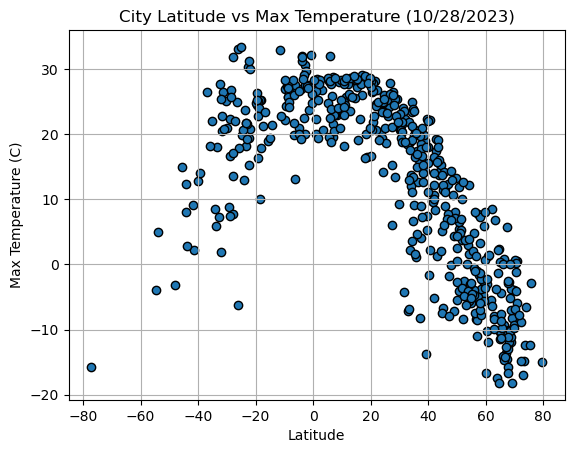

In [90]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (10/28/2023)")
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

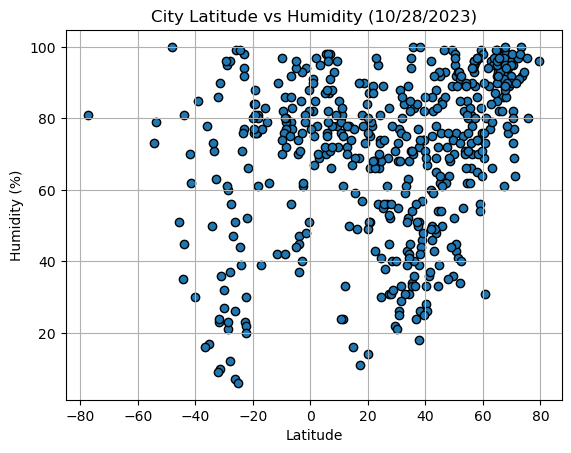

In [92]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (10/28/2023)")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

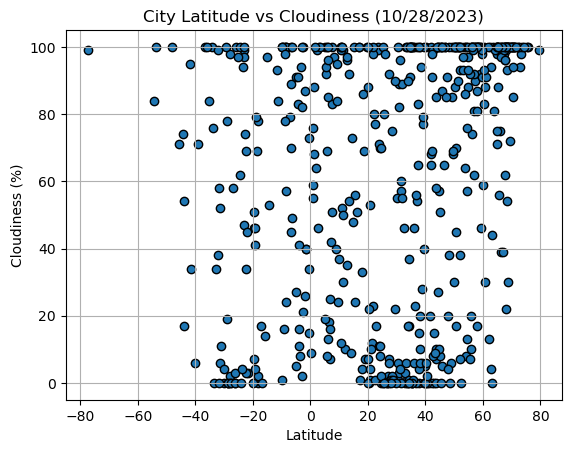

In [93]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (10/28/2023)")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

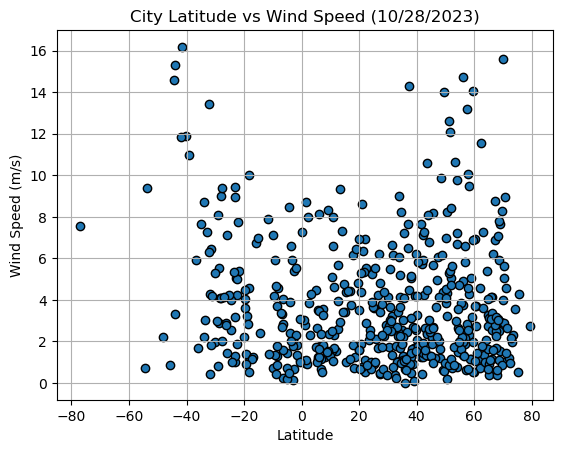

In [94]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (10/28/2023)")
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [134]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.copy()
northern_hemi_df = northern_hemi_df.loc[northern_hemi_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.count()

City          391
Lat           391
Lng           391
Max Temp      391
Humidity      391
Cloudiness    391
Wind Speed    391
Country       391
Date          391
dtype: int64

In [135]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.copy()
southern_hemi_df = southern_hemi_df.loc[southern_hemi_df['Lat'] < 0]

# Display sample data
southern_hemi_df.count()

City          119
Lat           119
Lng           119
Max Temp      119
Humidity      119
Cloudiness    119
Wind Speed    119
Country       115
Date          119
dtype: int64

In [137]:
## Max Temperature ##

# North
(mt_n_slope, mt_n_intercept, mt_n_rvalue, mt_n_pvalue, mt_n_stderr) = st.linregress(northern_hemi_df['Lat'],
                                                               northern_hemi_df['Max Temp'])

mt_n_fit = mt_n_slope * northern_hemi_df['Lat'] + mt_n_intercept

# South
(mt_s_slope, mt_s_intercept, mt_s_rvalue, mt_s_pvalue, mt_s_stderr) = st.linregress(southern_hemi_df['Lat'],
                                                               southern_hemi_df['Max Temp'])

mt_s_fit = mt_s_slope * southern_hemi_df['Lat'] + mt_s_intercept


## Humidity ##

# North
(h_n_slope, h_n_intercept, h_n_rvalue, h_n_pvalue, h_n_stderr) = st.linregress(northern_hemi_df['Lat'],
                                                               northern_hemi_df['Humidity'])

h_n_fit = h_n_slope * northern_hemi_df['Lat'] + h_n_intercept

#South
(h_s_slope, h_s_intercept, h_s_rvalue, h_s_pvalue, h_s_stderr) = st.linregress(southern_hemi_df['Lat'],
                                                               southern_hemi_df['Humidity'])

h_s_fit = h_s_slope * southern_hemi_df['Lat'] + h_s_intercept


## Cloudiness ##

# North
(c_n_slope, c_n_intercept, c_n_rvalue, c_n_pvalue, c_n_stderr) = st.linregress(northern_hemi_df['Lat'],
                                                               northern_hemi_df['Cloudiness'])

c_n_fit = c_n_slope * northern_hemi_df['Lat'] + c_n_intercept

# South
(c_s_slope, c_s_intercept, c_s_rvalue, c_s_pvalue, c_s_stderr) = st.linregress(southern_hemi_df['Lat'],
                                                               southern_hemi_df['Cloudiness'])

c_s_fit = c_s_slope * southern_hemi_df['Lat'] + c_s_intercept


## Wind Speed ##

# North
(ws_n_slope, ws_n_intercept, ws_n_rvalue, ws_n_pvalue, ws_n_stderr) = st.linregress(northern_hemi_df['Lat'],
                                                               northern_hemi_df['Wind Speed'])

ws_n_fit = ws_n_slope * northern_hemi_df['Lat'] + ws_n_intercept

# South
(ws_s_slope, ws_s_intercept, ws_s_rvalue, ws_s_pvalue, ws_s_stderr) = st.linregress(southern_hemi_df['Lat'],
                                                               southern_hemi_df['Wind Speed'])

ws_s_fit = ws_s_slope * southern_hemi_df['Lat'] + ws_s_intercept


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8728227693731895


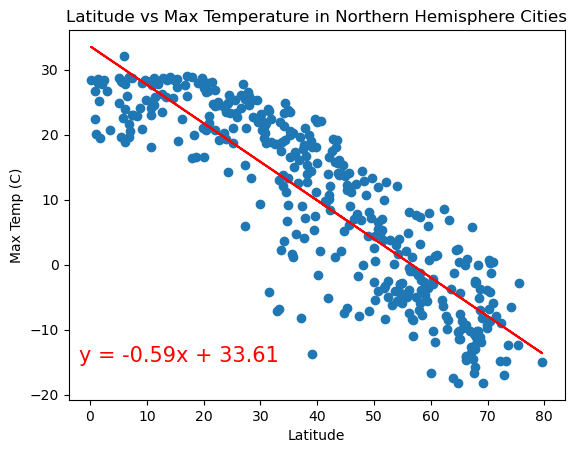

In [154]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker='o')
plt.ylabel('Max Temp (C)')
plt.xlabel('Latitude')

plt.plot(northern_hemi_df['Lat'], mt_n_fit, '-', color='r')

line_eq = f'y = {str(round(mt_n_slope,2))}x + {str(round(mt_n_intercept,2))}'
plt.annotate(line_eq,(-2,-15),fontsize=15,color="red")


print(f'The r-value is: {st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])[0]}')
plt.title('Latitude vs Max Temperature in Northern Hemisphere Cities')

# Show plot
plt.show()

The r-value is: 0.6815261911047826


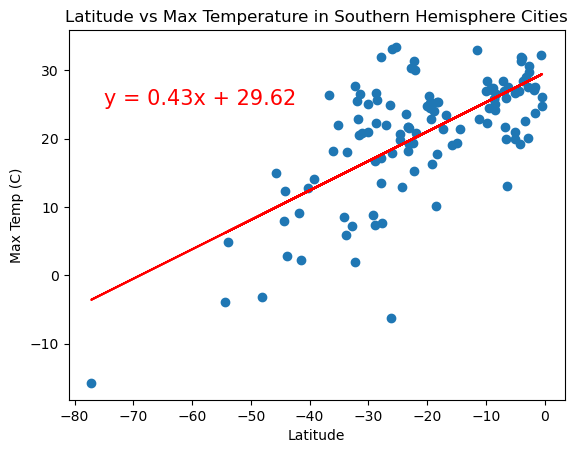

In [155]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o')
plt.ylabel('Max Temp (C)')
plt.xlabel('Latitude')

plt.plot(southern_hemi_df['Lat'], mt_s_fit, '-', color='r')

line_eq = f'y = {str(round(mt_s_slope,2))}x + {str(round(mt_s_intercept,2))}'
plt.annotate(line_eq,(-75,25),fontsize=15,color="red")


print(f'The r-value is: {st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])[0]}')
plt.title('Latitude vs Max Temperature in Southern Hemisphere Cities')

# Show plot
plt.show()

**Discussion about the linear relationship:** From the calculated r-values and the visualized plot we can see that Latitude and Max Temperature are quite highly correlated across both Northern and Southern Hemisphere cities. There is more of a correlation in the Northern Hemisphere although I'm not sure if this is due to an actual correlation or a result of our random set of cities.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.28742771344546636


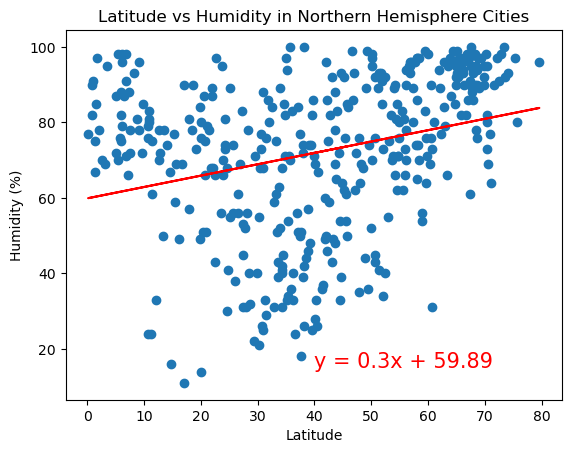

In [156]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker='o')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

plt.plot(northern_hemi_df['Lat'], h_n_fit, '-', color='r')

line_eq = f'y = {str(round(h_n_slope,2))}x + {str(round(h_n_intercept,2))}'
plt.annotate(line_eq,(40,15),fontsize=15,color="red")


print(f'The r-value is: {st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])[0]}')
plt.title('Latitude vs Humidity in Northern Hemisphere Cities')

# Show plot
plt.show()

The r-value is: 0.21786146430551756


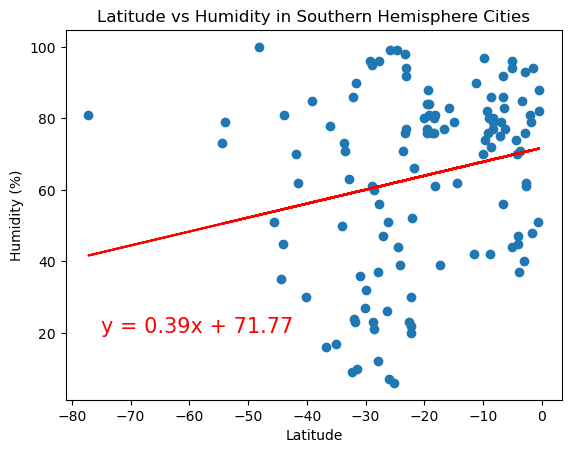

In [157]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker='o')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

plt.plot(southern_hemi_df['Lat'], h_s_fit, '-', color='r')

line_eq = f'y = {str(round(h_s_slope,2))}x + {str(round(h_s_intercept,2))}'
plt.annotate(line_eq,(-75,20),fontsize=15,color="red")


print(f'The r-value is: {st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])[0]}')
plt.title('Latitude vs Humidity in Southern Hemisphere Cities')

# Show plot
plt.show()

**Discussion about the linear relationship:** The relationship between Latitude and Humidity is much weaker than that of Latitude and Max Temperature. There is still a very weak correlation for both hemispheres meaning humidity can roughly be predicted from the Latitude of a city but it's not strong enough to be confident in any one response.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3103028791235761


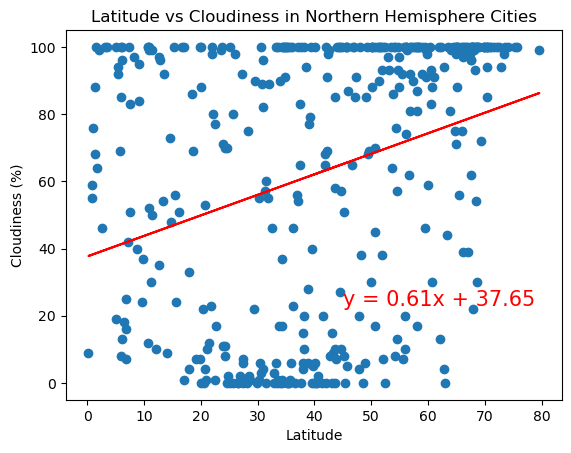

In [162]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker='o')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

plt.plot(northern_hemi_df['Lat'], c_n_fit, '-', color='r')

line_eq = f'y = {str(round(c_n_slope,2))}x + {str(round(c_n_intercept,2))}'
plt.annotate(line_eq,(45,23),fontsize=15,color="red")


print(f'The r-value is: {st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])[0]}')
plt.title('Latitude vs Cloudiness in Northern Hemisphere Cities')

# Show plot
plt.show()

The r-value is: -0.01112970235106478


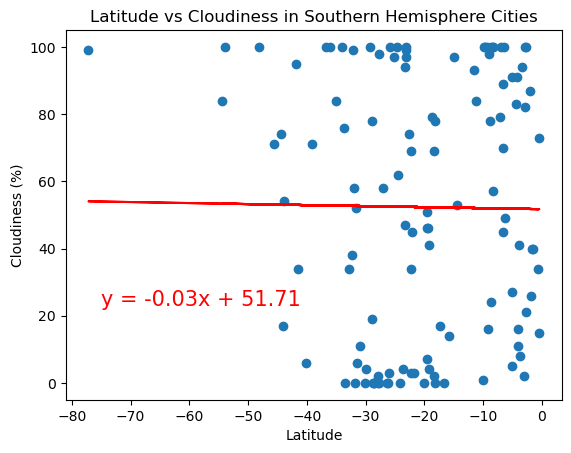

In [166]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker='o')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

plt.plot(southern_hemi_df['Lat'], c_s_fit, '-', color='r')

line_eq = f'y = {str(round(c_s_slope,2))}x + {str(round(c_s_intercept,2))}'
plt.annotate(line_eq,(-75,23),fontsize=15,color="red")


print(f'The r-value is: {st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])[0]}')
plt.title('Latitude vs Cloudiness in Southern Hemisphere Cities')

# Show plot
plt.show()

**Discussion about the linear relationship:** Due to the variability in the r-values between the Northern and Southern Hemispheres relationship of Latitude and Cloudiness we can assume that there is little to no correlation between the two factors and any observed correlation could be a result of randomness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07480202977444278


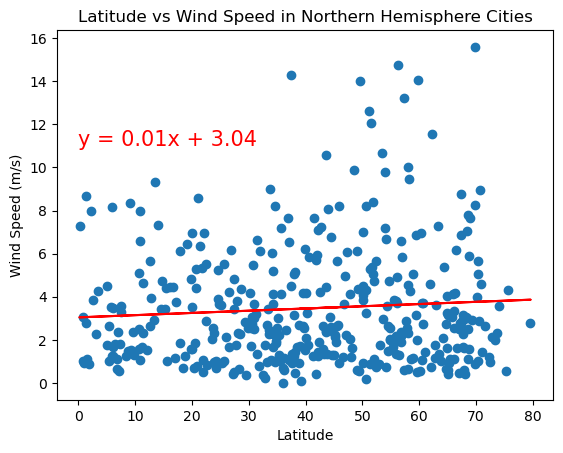

In [171]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker='o')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

plt.plot(northern_hemi_df['Lat'], ws_n_fit, '-', color='r')

line_eq = f'y = {str(round(ws_n_slope,2))}x + {str(round(ws_n_intercept,2))}'
plt.annotate(line_eq,(0,11),fontsize=15,color="red")


print(f'The r-value is: {st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])[0]}')
plt.title('Latitude vs Wind Speed in Northern Hemisphere Cities')

# Show plot
plt.show()

The r-value is: -0.42207804675179067


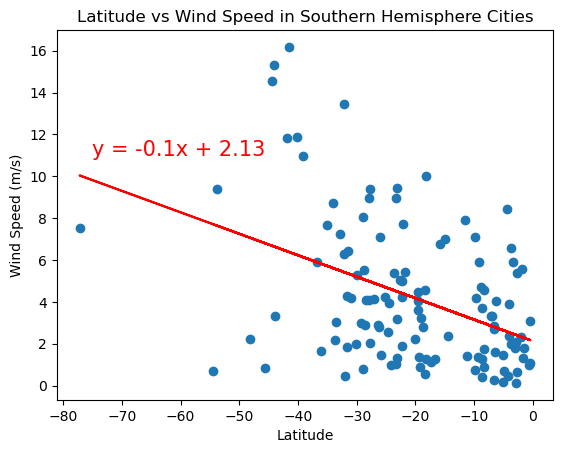

In [176]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker='o')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

plt.plot(southern_hemi_df['Lat'], ws_s_fit, '-', color='r')

line_eq = f'y = {str(round(ws_s_slope,2))}x + {str(round(ws_s_intercept,2))}'
plt.annotate(line_eq,(-75,11),fontsize=15,color="red")


print(f'The r-value is: {st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])[0]}')
plt.title('Latitude vs Wind Speed in Southern Hemisphere Cities')

# Show plot
plt.show()

**Discussion about the linear relationship:** Similarly to the relationship between Latitude and Cloudiness there is not enough data to confidently support any correlation between Wind Speed and Latitude. With the Northern Hemisphere being very slightly positively correlated and the Southern Hemisphere being decently negatively correlated it is difficult to say whether these are based on our random sample or an actual relationship between the two factors.